In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [7]:
poll.vote.value_counts(normalize = True)
#to gethe info 

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [12]:
def sample(brown, n = 1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(5) < 0.51, 'Brown', 'Green')})
    

In [13]:
s = sample(0.51, n = 1000)

In [14]:
s.vote.value_counts(normalize = True)

Green    1.0
Name: vote, dtype: float64

In [15]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize = True) for i in range(1000)])

In [16]:
dist.head()

,Brown,Green
vote,1.0,NaN
vote,1.0,NaN
vote,0.6,0.4
vote,0.4,0.6
vote,0.6,0.4


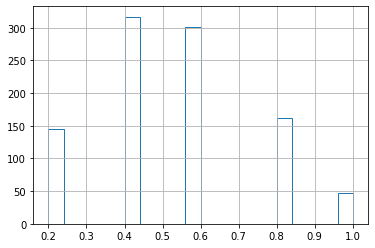

In [18]:
dist.Brown.hist(histtype = 'step', bins = 20)

In [19]:
def samplingdist(brown, n = 1000):
    return pd.DataFrame([sample(0.51).vote.value_counts(normalize = True) for i in range(1000)])

In [28]:
def quantiles(brown, n = 1000):
    dist = samplingdist(brown, n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [29]:
quantiles(0.50)

(0.2, 0.8)

In [30]:
quantiles(0.48)

(0.2, 0.9799999999999954)

In [31]:
quantiles(0.54)

(0.2, 1.0)

In [32]:
dist = samplingdist(0.50, 10000)

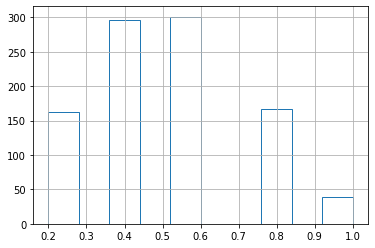

In [33]:
dist.Brown.hist(histtype = 'step')

In [35]:
largepoll = pd.read_csv('poll-larger.csv')

In [36]:
largepoll.vote.value_counts(normalize =True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64